原始性能数据:
               NOS     RUS     ROS   SMOTE  BorderlineSMOTE  KMeansSMOTE  \
Dataset_1   65.335  55.046  50.850  52.850           38.133       52.313   
Dataset_2   91.622  87.773  91.001  89.773           88.346       86.090   
Dataset_3   89.800  44.056  91.466  65.111           64.213       61.114   
Dataset_4   81.916  77.384  80.426  81.698           72.983       78.877   
Dataset_5   90.329  84.226  97.126  92.456           93.599       91.828   
Dataset_6   99.217  99.323  99.585  99.498           98.828       98.639   
Dataset_7   87.006  82.243  90.277  89.981           89.523       89.204   
Dataset_8   61.222  65.016  62.911  56.986           56.009       62.691   
Dataset_9   91.334  94.017  96.965  96.923           96.826       96.721   
Dataset_10  94.812  95.787  95.364  95.350           96.423       94.267   
Dataset_11  92.477  91.566  92.205  91.974           92.817       91.576   
Dataset_12  81.789  83.572  84.702  84.790           84.458       84.967   
Data

C:\Users\zsc\AppData\Local\Temp\ipykernel_10604\1354353776.py:80: UserWarning: Glyph 31639 (\N{CJK UNIFIED IDEOGRAPH-7B97}) missing from current font.
  plt.tight_layout()
C:\Users\zsc\AppData\Local\Temp\ipykernel_10604\1354353776.py:80: UserWarning: Glyph 27861 (\N{CJK UNIFIED IDEOGRAPH-6CD5}) missing from current font.
  plt.tight_layout()
C:\Users\zsc\AppData\Local\Temp\ipykernel_10604\1354353776.py:80: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
C:\Users\zsc\AppData\Local\Temp\ipykernel_10604\1354353776.py:80: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  plt.tight_layout()
C:\Users\zsc\AppData\Local\Temp\ipykernel_10604\1354353776.py:80: UserWarning: Glyph 25490 (\N{CJK UNIFIED IDEOGRAPH-6392}) missing from current font.
  plt.tight_layout()
C:\Users\zsc\AppData\Local\Temp\ipykernel_10604\1354353776.py:80: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from cur

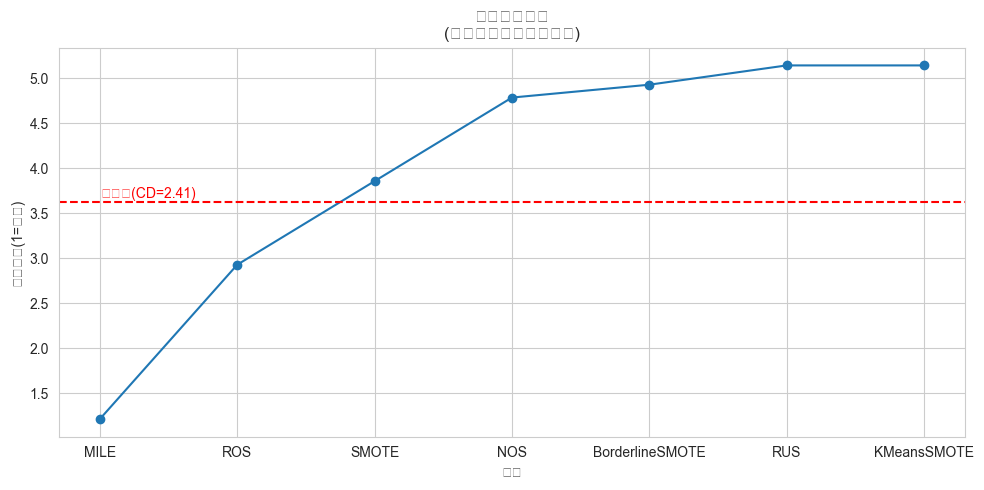

ValueError: Unknown format code 'd' for object of type 'float'

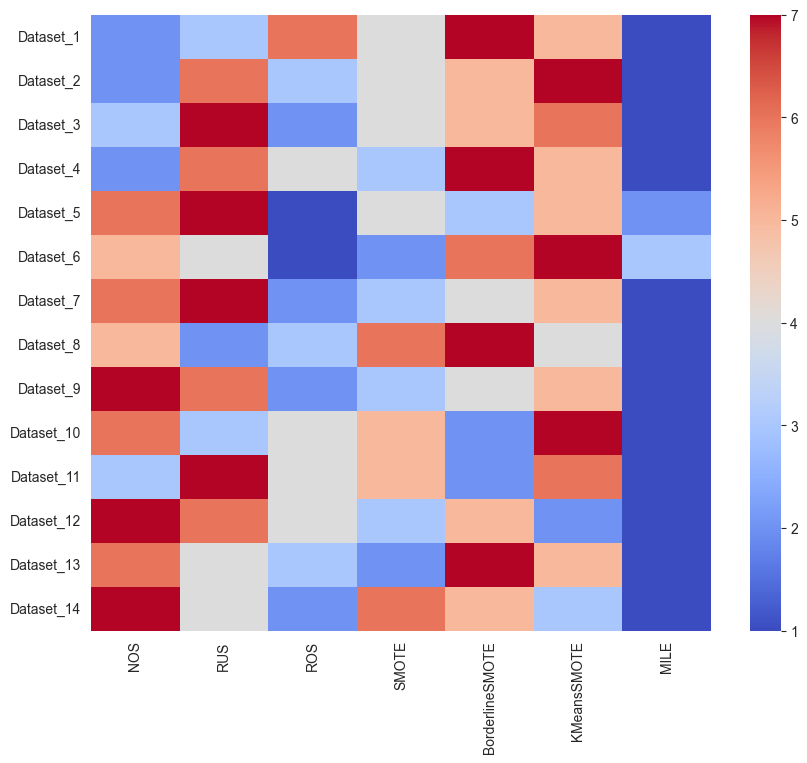

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据：14个数据集(行) x 7种算法(列)的性能指标
# 这里用随机数据模拟，实际替换为你的真实数据
np.random.seed(42)
data=[
    [65.3347, 55.04581, 50.84999333, 52.84985, 38.13332, 52.31321333, 72.36296333], # Automobile
    [91.6223, 87.77303, 91.00078, 89.77276, 88.34569667, 86.08974667, 98.19252], # BalanceScale
    [89.7998, 44.05645, 91.4663, 65.11082, 64.21336, 61.11438667, 93.54511333], # Dermatology
    [81.9158, 77.38367667, 80.42555, 81.6983, 72.98285, 78.87670333, 87.19212667], # Ecoli
    [90.3292, 84.22582333, 97.12585667, 92.45642333, 93.59870333, 91.82761667, 95.31468667], # Car
    [99.217, 99.32321, 99.58464333, 99.49793, 98.82750667, 98.63917667, 99.46187333], # Pen-Digits
    [87.0065, 82.24294333, 90.27745667, 89.98106667, 89.52326333, 89.20363333, 92.07167333], # WallRobot
    [61.2221, 65.01646667, 62.91148667, 56.98599333, 56.00899333, 62.69075667, 66.51848333], # German
    [91.3342, 94.01743667, 96.96492, 96.92261, 96.8265, 96.72133333, 99.24170333], # Wine
    [94.8117, 95.78677667, 95.36417667, 95.34983667, 96.42283, 94.26718, 96.69507], # Pen-Based 
    [92.4768, 91.56633667, 92.20507667, 91.97391, 92.81678333, 91.57589333, 96.16294], # USPS
    [81.7886, 83.57177667, 84.70244, 84.79028667, 84.45792333, 84.96660667, 87.23519667], # Satellite
    [98.7627, 98.86917667, 99.08886333, 99.0933, 98.73269333, 98.8321, 100], # Shuttle
    [48.1712, 52.37071, 52.98673, 52.25134667, 52.36374333, 52.45353333, 53.35844667] # Contraceptive
]
algorithm_names = ['NOS', 'RUS', 'ROS', 'SMOTE', 'BorderlineSMOTE', 'KMeansSMOTE', 'MILE']
dataset_names = [f'Dataset_{i}' for i in range(1, 15)]

# 创建DataFrame
df = pd.DataFrame(data, columns=algorithm_names, index=dataset_names)
print("原始性能数据:")
print(df.round(3))

# 1. Friedman检验 --------------------------------------------
# 对每个数据集中的算法表现进行排名(1=最好)
ranks = df.rank(axis=1, ascending=False)  # 假设数值越大性能越好

print("\n排名矩阵:")
print(ranks.astype(int))

# 计算平均排名
average_ranks = ranks.mean()
print("\n算法平均排名:")
print(average_ranks.sort_values())

# 执行Friedman检验
stat, p = friedmanchisquare(*[df[alg] for alg in df.columns])

print(f"\nFriedman检验结果:")
print(f"统计量: {stat:.4f}")
print(f"p值: {p:.6f}")

if p < 0.05:
    print("结论: 拒绝零假设(p < 0.05)，算法性能存在显著差异")
    
    # 2. 事后分析: Nemenyi检验 -------------------------------
    # 计算临界差(CD)
    N, k = df.shape  # 数据集数量，算法数量
    q_alpha = 2.948  # 对于alpha=0.05和7种算法，查Nemenyi检验表得到
    CD = q_alpha * np.sqrt(k*(k+1)/(6*N))
    
    print(f"\nNemenyi检验临界差(CD): {CD:.4f}")
    print("平均排名差大于CD的算法对才有显著差异")
    
    # 可视化平均排名
    plt.figure(figsize=(10, 5))
    average_ranks_sorted = average_ranks.sort_values()
    plt.plot(average_ranks_sorted.values, 'o-')
    plt.xticks(range(k), average_ranks_sorted.index)
    plt.xlabel('算法')
    plt.ylabel('平均排名(1=最好)')
    plt.title('算法平均排名\n(水平线显示临界差范围)')
    
    # 添加临界差指示线
    best_rank = average_ranks_sorted.iloc[0]
    plt.axhline(y=best_rank + CD, color='r', linestyle='--')
    plt.text(0, best_rank + CD + 0.05, f'临界差(CD={CD:.2f})', color='r')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 3. 性能比较热图 ----------------------------------------
    plt.figure(figsize=(10, 8))
    sns.heatmap(ranks, annot=True, fmt='d', cmap='coolwarm')
    plt.title('各数据集上算法排名(1=最好)')
    plt.show()
    
else:
    print("结论: 不能拒绝零假设(p ≥ 0.05)，算法性能无显著差异")

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier